# Problem Statement :- 
~~~ps
        Goal It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value   of the SalePrice variable
~~~

In [1]:
#lets start

## Import libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns",300)

## Read Dataset

In [4]:
# Training Data
train_df = pd.read_csv(r"C:\Users\Pranit\OneDrive\Desktop\AI\AI\ASSIGNMENT\training_set.csv")
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
#Testing data
test_df = pd.read_csv(r"C:\Users\Pranit\OneDrive\Desktop\AI\AI\ASSIGNMENT\testing_set.csv")
test_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [6]:
# lets check the info
train_df.info()
print("----------------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Missing Data Treatment

In [7]:
# some missing values which are interpreted as na , we are filling them
# On Training Dataset
train_df.Alley  = train_df.Alley.fillna("no_alley_access")
train_df.BsmtQual = train_df.BsmtQual.fillna("No_Basement")
train_df.BsmtCond = train_df.BsmtCond.fillna("No_Basement")
train_df.BsmtExposure = train_df.BsmtExposure.fillna("No_Basement")
train_df.BsmtFinType1 = train_df.BsmtFinType1.fillna("No_Basement")
train_df.BsmtFinType2 = train_df.BsmtFinType2.fillna("No_Basement")
train_df.FireplaceQu = train_df.FireplaceQu.fillna("No_fireplace")
train_df.GarageType = train_df.GarageType.fillna("No_Garage")
train_df.GarageFinish = train_df.GarageFinish.fillna("No_Garage")
train_df.GarageQual = train_df.GarageQual.fillna("No_Garage")
train_df.GarageCond = train_df.GarageCond.fillna("No_Garage")
train_df.PoolQC = train_df.PoolQC.fillna("No_pool")
train_df.Fence = train_df.Fence.fillna("No_fence")
train_df.MiscFeature = train_df.MiscFeature.fillna("None")

In [8]:
#On Testing dataset
test_df.Alley  = test_df.Alley.fillna("no_alley_access")
test_df.BsmtQual = test_df.BsmtQual.fillna("No_Basement")
test_df.BsmtCond = test_df.BsmtCond.fillna("No_Basement")
test_df.BsmtExposure = test_df.BsmtExposure.fillna("No_Basement")
test_df.BsmtFinType1 = test_df.BsmtFinType1.fillna("No_Basement")
test_df.BsmtFinType2 = test_df.BsmtFinType2.fillna("No_Basement")
test_df.FireplaceQu = test_df.FireplaceQu.fillna("No_fireplace")
test_df.GarageType = test_df.GarageType.fillna("No_Garage")
test_df.GarageFinish = test_df.GarageFinish.fillna("No_Garage")
test_df.GarageQual = test_df.GarageQual.fillna("No_Garage")
test_df.GarageCond = test_df.GarageCond.fillna("No_Garage")
test_df.PoolQC = test_df.PoolQC.fillna("No_pool")
test_df.Fence = test_df.Fence.fillna("No_fence")
test_df.MiscFeature = test_df.MiscFeature.fillna("None")

In [9]:
train_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
test_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

## Cat Con

In [11]:
con = []
cat = []
for i in train_df.columns:
    if (train_df[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [12]:
print(cat)
print("----------------")
print(con)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
----------------
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',

In [13]:
# some values in con are categorical , so removing them from con and adding in cat
Q = list(train_df[con].nunique().sort_values().index[0:15])
Q

['BsmtHalfBath',
 'HalfBath',
 'FullBath',
 'BsmtFullBath',
 'Fireplaces',
 'KitchenAbvGr',
 'GarageCars',
 'YrSold',
 'BedroomAbvGr',
 'PoolArea',
 'OverallCond',
 'OverallQual',
 'TotRmsAbvGrd',
 'MoSold',
 'MSSubClass']

In [14]:
for i in Q:
    con.remove(i)
    cat.append(i)
# we have removed cols from con and added in cat

In [15]:
# here built year is not imp so drop them
A = ["YearBuilt","YearRemodAdd","GarageYrBlt"]
for i in A:
    con.remove(i)

In [16]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'BsmtHalfBath',
 'HalfBath',
 'FullBath',
 'BsmtFullBath',
 'Fireplaces',
 'KitchenAbvGr',
 'GarageCars',
 'YrSold',
 'BedroomAbvGr',
 'PoolArea',
 'OverallCond',
 'OverallQual',
 'TotRmsAbvGrd',
 'MoSold',
 'MSSubClass']

In [17]:
cat.remove("YrSold")

In [18]:
con.remove("SalePrice")

## Fillna

In [19]:
# filling null values with mean and mode
# will fill 

for i in cat:
    x = train_df[i].mode()[0]
    train_df[i] = train_df[i].fillna(x)
    test_df[i] = test_df[i].fillna(x)
for i in con:
    x= train_df[i].mean()
    train_df[i]= train_df[i].fillna(x)
    test_df[i]= test_df[i].fillna(x)

In [20]:
train_df.isna().sum() # null values are gone

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [21]:
test_df.isna().sum()  # all null values are filled

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# Outliers

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(train_df[con]),columns=con)

out = []
for i in con:
    out = out + list(X1[(X1[i]>3)|(X1[i]<-3)].index)
    
from numpy import unique
outliers = list(unique(out))

In [23]:
train_df= train_df.drop(index=outliers,axis=0)     #outliers gone

In [24]:
train_df.shape

(1170, 81)

In [25]:
train_df.index = range(0 ,train_df.shape[0],1)    #reindexing
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,no_alley_access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_pool,No_fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,no_alley_access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_pool,No_fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,no_alley_access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_pool,No_fence,None,0,9,2008,WD,Normal,223500
3,5,60,RL,84.0,14260,Pave,no_alley_access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_pool,No_fence,None,0,12,2008,WD,Normal,250000
4,7,20,RL,75.0,10084,Pave,no_alley_access,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,No_pool,No_fence,None,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,1453,180,RM,35.0,3675,Pave,no_alley_access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,No_fireplace,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,No_pool,No_fence,None,0,5,2006,WD,Normal,145000
1166,1454,20,RL,90.0,17217,Pave,no_alley_access,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,No_fireplace,No_Garage,NaN,No_Garage,0,0,No_Garage,No_Garage,Y,36,56,0,0,0,0,No_pool,No_fence,None,0,7,2006,WD,Abnorml,84500
1167,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,No_fireplace,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,No_pool,No_fence,None,0

### find the age of the features

In [26]:
train_df["Built_age"] = 2023 - train_df.YearBuilt
train_df["remodel_age"] = 2023 - train_df.YearRemodAdd
train_df["garage_age"] = 2023 - train_df.GarageYrBlt
train_df["property_age"] = 2023 - train_df.YrSold

test_df["Built_age"] = 2023 - test_df.YearBuilt
test_df["remodel_age"] = 2023 - test_df.YearRemodAdd
test_df["garage_age"] = 2023 - test_df.GarageYrBlt
test_df["property_age"] = 2023 - test_df.YrSold

### dropping some features which are of no use

In [27]:
train_df = train_df.drop(labels=["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold" ] , axis = 1)

In [28]:
test_df = test_df.drop(labels=["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold" ] , axis = 1)

In [29]:
train_df.shape

(1170, 81)

# Exploratory Data analysis

In [30]:
Q = pd.DataFrame(train_df.corr()[["SalePrice"]].sort_values(by = ["SalePrice"]))

In [31]:
Imp_cols=list(Q[(Q.SalePrice > 0.1)|(Q.SalePrice < -0.1)][Q.SalePrice != 1].index)
Imp_cols

['Built_age',
 'remodel_age',
 'garage_age',
 'EnclosedPorch',
 'KitchenAbvGr',
 'OverallCond',
 'BedroomAbvGr',
 'BsmtUnfSF',
 'BsmtFullBath',
 'HalfBath',
 '2ndFlrSF',
 'WoodDeckSF',
 'LotArea',
 'LotFrontage',
 'BsmtFinSF1',
 'OpenPorchSF',
 'MasVnrArea',
 'Fireplaces',
 'TotRmsAbvGrd',
 '1stFlrSF',
 'FullBath',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

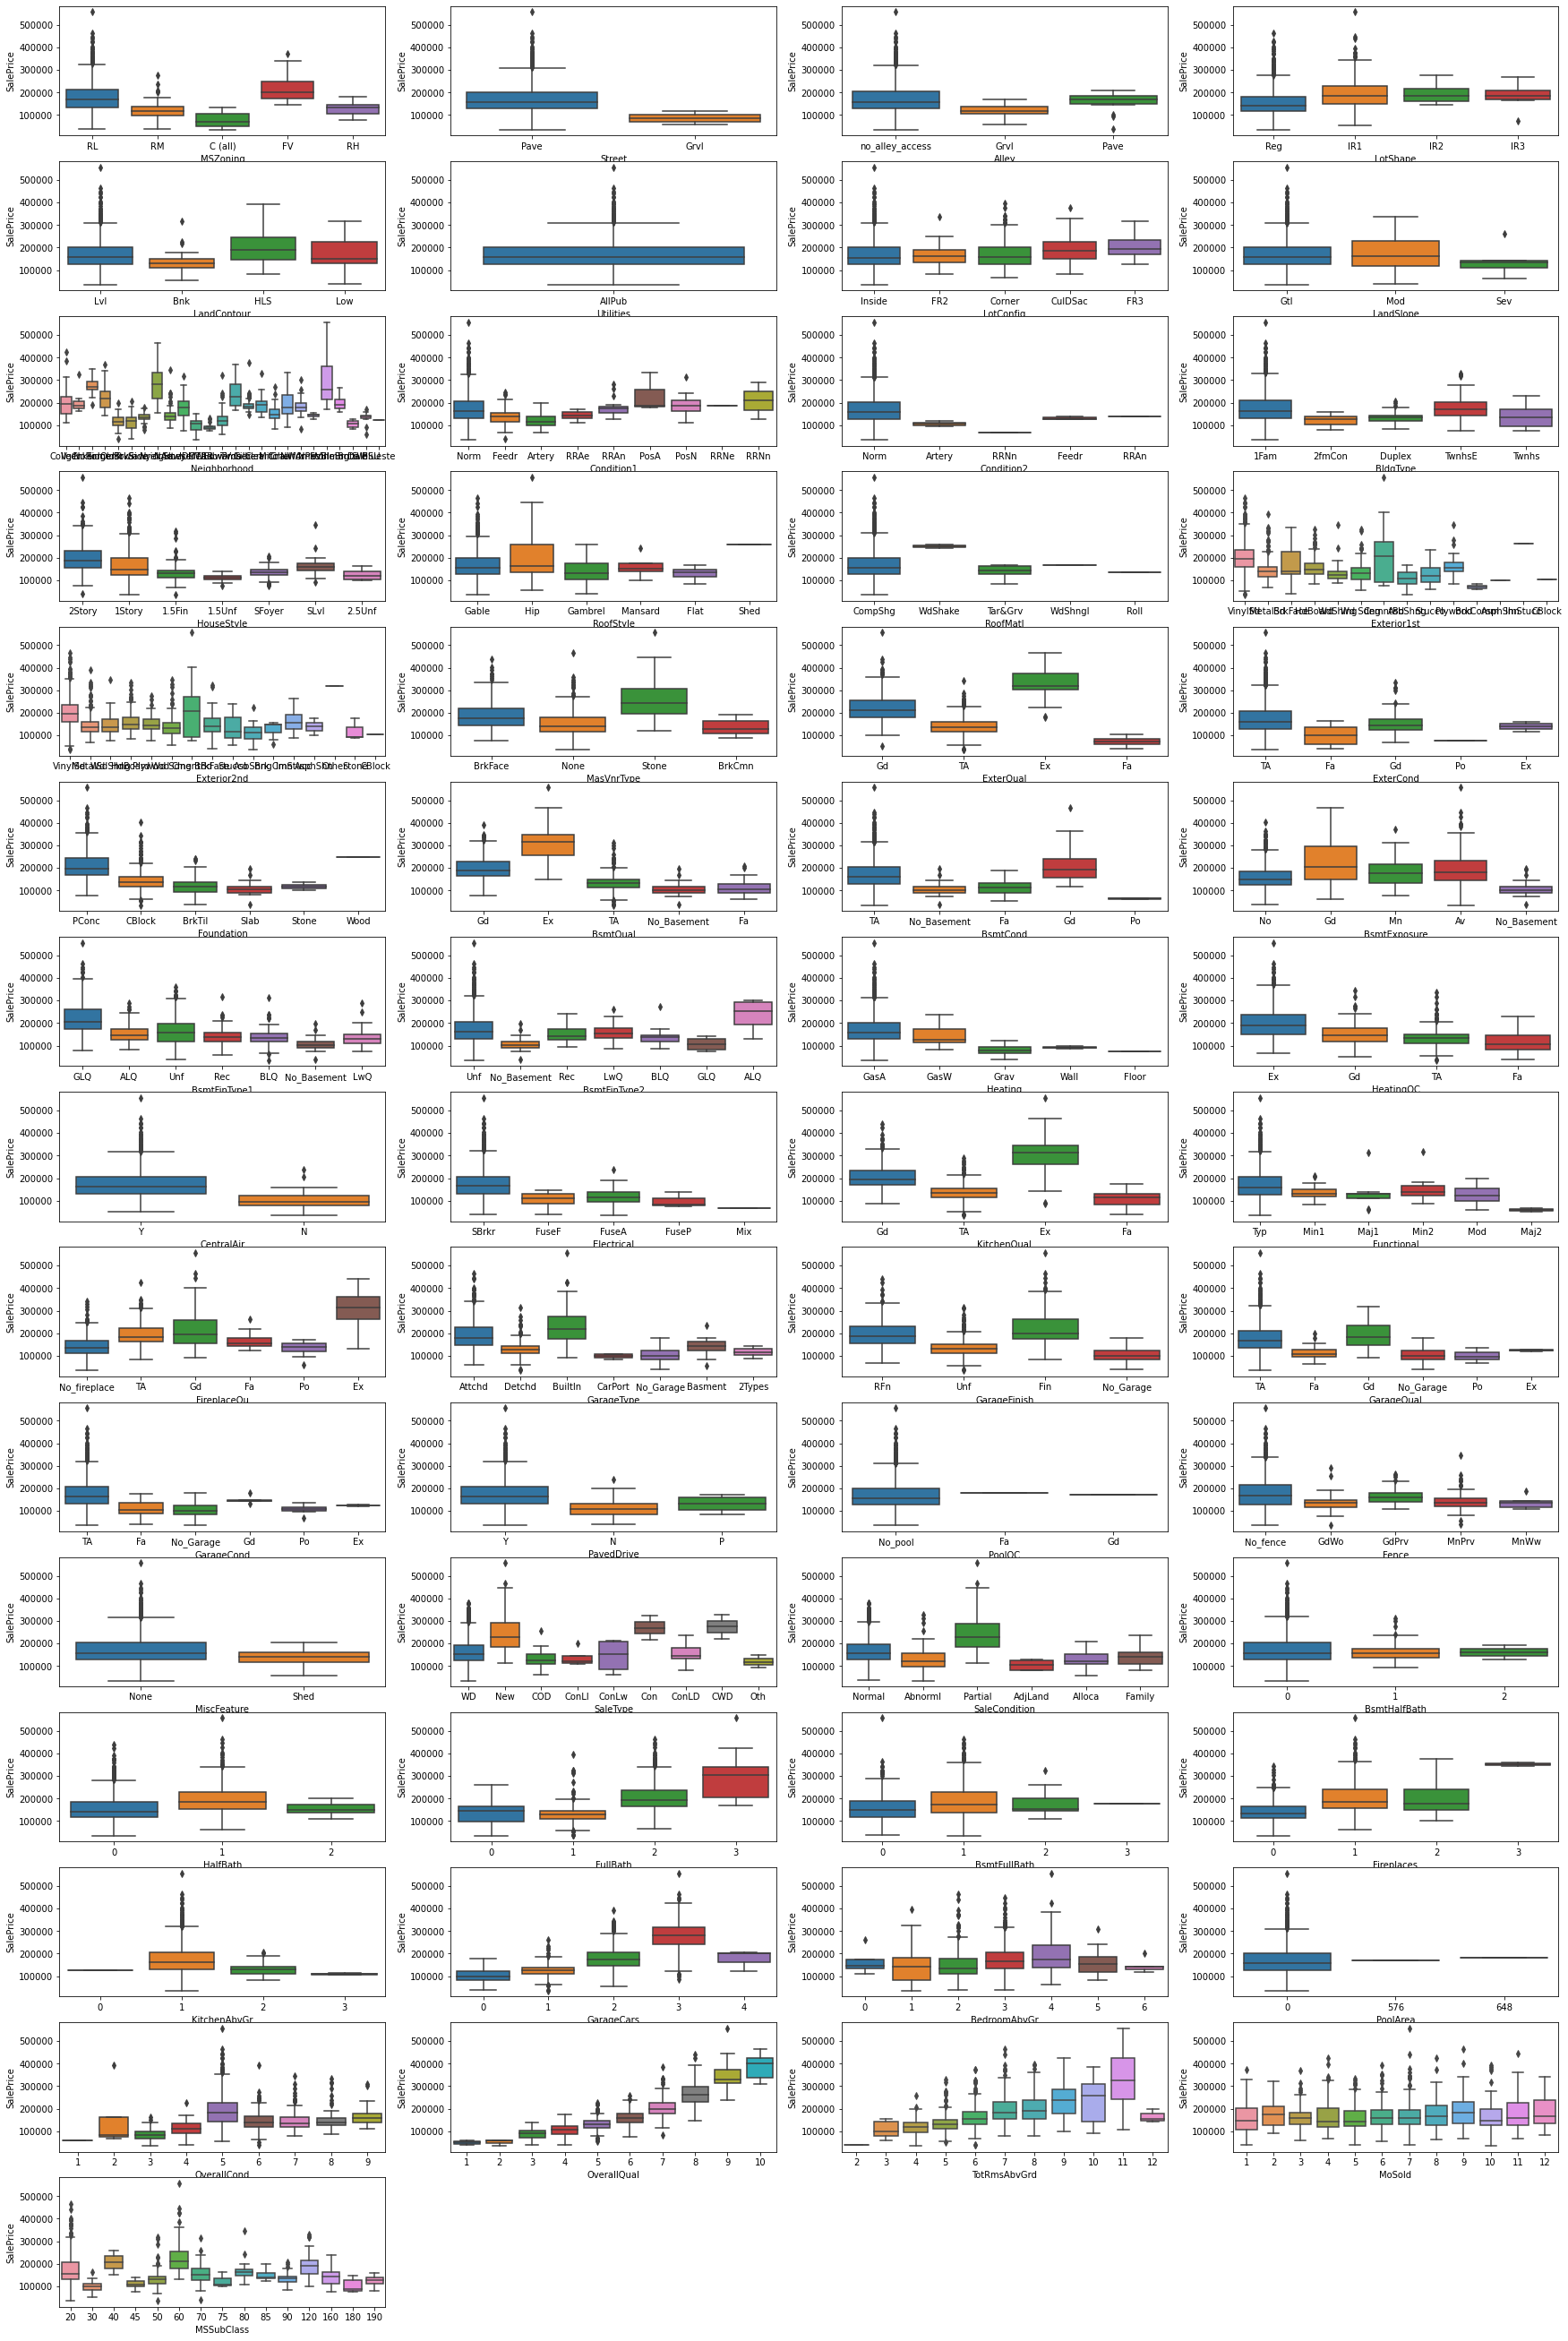

In [32]:
plt.figure(figsize=(30,60))
x = 0
for i in cat:
    x = x + 1
    plt.subplot(19,4,x)
    sns.boxplot(train_df[i],train_df.SalePrice)

## Data Preparation

In [33]:
train_df[con].head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0
4,7,75.0,10084,186.0,1369,0,317,1686,1694,0,0,1694,636,255,57,0,0,0,0


In [34]:
train_df[cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,BsmtHalfBath,HalfBath,FullBath,BsmtFullBath,Fireplaces,KitchenAbvGr,GarageCars,BedroomAbvGr,PoolArea,OverallCond,OverallQual,TotRmsAbvGrd,MoSold,MSSubClass
0,RL,Pave,no_alley_access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No_fireplace,Attchd,RFn,TA,TA,Y,No_pool,No_fence,None,WD,Normal,0,1,2,1,0,1,2,3,0,5,7,8,2,60
1,RL,Pave,no_alley_access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No_pool,No_fence,None,WD,Normal,1,0,2,0,1,1,2,3,0,8,6,6,5,20
2,RL,Pave,no_alley_access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No_pool,No_fence,None,WD,Normal,0,1,2,1,1,1,2,3,0,5,7,6,9,60
3,RL,Pave,no_alley_access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No_pool,No_fence,None,WD,Normal,0,1,2,1,1,1,3,4,0,5,8,9,12,60
4,RL,Pave,no_alley_access,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,No_pool,No_fence,None,WD,Normal,0,0,2,1,1,1,2,3,0,5,8,7,8,20


# Preprocessing

1. Standardization of continuous variables
2. One hot encoder for Categorical columns

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x1 = pd.DataFrame(ss.fit_transform(train_df[con]) , columns=con)
x2 = pd.get_dummies(train_df[cat])
X = x1.join(x2)
X.head(3)            # our training data is ready                                

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,BsmtHalfBath,HalfBath,FullBath,BsmtFullBath,Fireplaces,KitchenAbvGr,GarageCars,BedroomAbvGr,PoolArea,OverallCond,OverallQual,TotRmsAbvGrd,MoSold,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_no_alley_access,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_Fin,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQ

In [36]:
#for testing data set
x11 = pd.DataFrame(ss.transform(test_df[con]) , columns=con)
x22 = pd.get_dummies(test_df[cat])
XX = x11.join(x22)

In [37]:
len(X.columns) , len(XX.columns)

(283, 281)

In [38]:
XX[X.columns]

KeyError: "['Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Heating_Floor', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa'] not in index"

In [39]:
V = ['Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Heating_Floor', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa']

In [40]:
for i in V:
    XX[i] = 0 

In [41]:
XX[X.columns]             # Equal columns in training and testing

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,BsmtHalfBath,HalfBath,FullBath,BsmtFullBath,Fireplaces,KitchenAbvGr,GarageCars,BedroomAbvGr,PoolArea,OverallCond,OverallQual,TotRmsAbvGrd,MoSold,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_no_alley_access,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_Fin,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQ

In [42]:
Y = train_df[["SalePrice"]]

# Splitting X and Y

In [43]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size= 0.2 , random_state= 31)

# Model 1

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
tr_err,ts_err

(235166801.94, 5.280557111597968e+24)

In [45]:
from statsmodels.api import add_constant , OLS
xconst = add_constant(xtrain , has_constant = "add")
ols = OLS(ytrain , xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     54.89
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:19:06   Log-Likelihood:                -10349.
No. Observations:                 936   AIC:                         2.115e+04
Df Residuals:                     710   BIC:                         2.224e+04
Df Model:                         225                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4487.2467   2516.780      1.783      0.075    -453.974    9428.468
Id                        -134.1236    649.453     -0.207      0.836   -1409.202    1140.954
LotFrontage              -1146.0482   1023.469     -1.120      0.263   -3155.436     863.340
LotArea                   2902.9902   1090.779      2.661      0.008     761.451    5044.529
MasVnrArea                 831.3561   1148.236      0.724      0.469   -1422.987    3085.699
BsmtFinSF1                5880.6147   1062.537      5.535      0.000    3794.525    7966.704
BsmtFinSF2                 101.4916   1383.296      0.073      0.942   -2614.349    2817.332
BsmtUnfSF                 1784.1726    882.439      2.022      0.044      51.671    3516.674
TotalBsmtSF               8413.1984   1489.397      5.649      0.000    5489.049    1.13e+04
1stFlrSF                  4780.0630   1544.333      3.095      0.002    1748.056    7812.070
2ndFlrSF                  9588.9395   1716.722      5.586      0.000    6218.481     1.3e+04
LowQualFinSF                69.9248    595.954      0.117      0.907   -1100.117    1239.967
GrLivArea                 1.268e+04   1351.968      9.378      0.000       1e+04    1.53e+04
GarageArea                4117.2591   1638.842      2.512      0.012     899.703    7334.815
WoodDeckSF                3269.7518    728.603      4.488      0.000    1839.277    4700.227
OpenPorchSF               1456.5280    784.565      1.856      0.064     -83.816    2996.872
EnclosedPorch              743.5756    745.105      0.998      0.319    -719.297    2206.448
3SsnPorch                 -437.1811    554.672     -0.788      0.431   -1526.174     651.812
ScreenPorch                711.9060    652.303      1.091      0.275    -568.768    1992.580
MiscVal                   -870.1502   1527.635     -0.570      0.569   -3869.372    2129.072
BsmtHalfBath              -840.1374   3166.316     -0.265      0.791   -7056.599    5376.325
HalfBath                  3609.1423   2189.039      1.649      0.100    -688.622    7906.907
FullBath                  4684.8919   2322.853      2.017      0.044     124.410    9245.374
BsmtFullBath              2872.0165   1967.645      1.460      0.145    -991.082    6735.115
Fireplaces                2557.6827   2731.973      0.936      0.349   -2806.029    7921.395
KitchenAbvGr             -1.198e+04   6587.883     -1.818      0.069   -2.49e+04     955.966
GarageCars                4465.7715   2365.992      1.887      0.060    -179.405    9110.948
BedroomAbvGr             -2199.1829   1504.460     -1.462      0.144   -5152.905     754.540
PoolArea                    39.9587     24.159      1.654      0.099      -7.473      87.390
OverallCond               4934.5284    828.712      5.954      0.000    3307.509    6561.548
OverallQual   

In [46]:
ols.pvalues.sort_values()

GrLivArea              8.862180e-20
OverallQual            2.850901e-10
OverallCond            4.102679e-09
TotalBsmtSF            2.339666e-08
2ndFlrSF               3.318774e-08
                           ...     
Exterior2nd_MetalSd    9.634725e-01
Condition1_RRNe        9.652442e-01
GarageType_CarPort     9.673769e-01
GarageType_Attchd      9.874526e-01
Fence_MnPrv            9.951420e-01
Length: 284, dtype: float64

In [47]:
ols.rsquared_adj

0.9284060153631691

In [48]:
col_to_drop = ols.pvalues.sort_values().index[-1]

# Models

In [49]:
Rs = []
for i in range(0,170,1):
    from sklearn.model_selection import train_test_split
    X= X.drop(labels = col_to_drop,axis = 1)
    xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size= 0.2 , random_state= 31)
    from statsmodels.api import add_constant , OLS
    xconst = add_constant(xtrain , has_constant= "add")
    ols = OLS(ytrain , xconst).fit()
    rsq = round(ols.rsquared_adj , 4)
    Rs.append(rsq)

    col_to_drop = ols.pvalues.sort_values().index[-1]
    if (col_to_drop == "const"):
        col_to_drop = ols.pvalues.sort_values().index[-2]
    else:
        col_to_drop = ols.pvalues.sort_values().index[-1]
    
   
    print(i , col_to_drop , ols.rsquared_adj)

0 GarageType_Attchd 0.9284060153631691
1 GarageType_CarPort 0.9284060153631691
2 Condition1_RRNe 0.928506613753039
3 Exterior2nd_MetalSd 0.9285066137530391
4 Exterior2nd_HdBoard 0.928506613753039
5 FireplaceQu_No_fireplace 0.9286069891138591
6 RoofMatl_WdShngl 0.9286069891138591
7 Condition1_Artery 0.9286069891138591
8 BsmtFinSF2 0.9287067529021303
9 Condition2_Artery 0.9287067529021303
10 SaleType_Oth 0.9287067529021303
11 Fence_GdPrv 0.9287067529021303
12 Functional_Maj2 0.9288057225709195
13 Functional_Maj1 0.9288057225709195
14 Heating_GasW 0.9289044822071351
15 RoofMatl_Roll 0.9289044822071351
16 LowQualFinSF 0.9289044822071351
17 1stFlrSF 0.9289044822071351
18 Exterior1st_Plywood 0.9290037439467083
19 Heating_Floor 0.9290037439467081
20 Condition2_RRAn 0.9290037439467083
21 GarageFinish_RFn 0.9291007283684158
22 GarageFinish_Unf 0.9291007283684158
23 GarageFinish_Fin 0.9291986289703102
24 MasVnrType_None 0.92929585098118
25 Foundation_PConc 0.9292958509811798
26 BsmtUnfSF 0.92929

# model after backward elimination

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain, ytrain)
ts_pred = model.predict(xtest)
tr_pred= model.predict(xtrain)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain , tr_pred)
ts_err = mean_squared_error(ytest , ts_pred)
tr_err , ts_err

(246499245.7081947, 467926435.3589215)

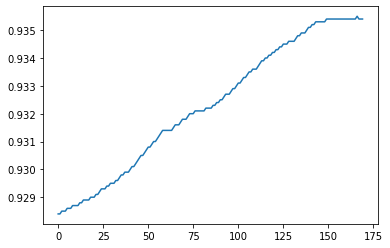

In [51]:
import matplotlib.pyplot as plt
plt.plot(Rs)

In [81]:
467926435-246499245

221427190

### Model is overfitted

In [52]:
def modeller(mo):         #creating a model object
    model = mo.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    return tr_err,ts_err

In [53]:
modeller(lr)

(246499245.71, 467926435.36)

# Regularization

In [54]:
from sklearn.linear_model import Ridge,Lasso

#### 1.Ridge

In [55]:
rr = Ridge(alpha=1)
modeller(rr)

(252334341.62, 426882659.61)

In [56]:
q = 0.0
alphas = []
for i in range(0,500):
    q = round(q + 0.1,2)
    alphas.append(q)

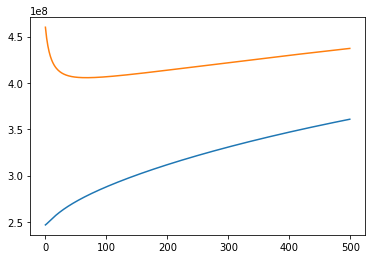

In [57]:
tr = []
ts = []
for i in alphas:
    rr = Ridge(alpha=i)
    tr_err,ts_err = modeller(rr)
    tr.append(tr_err)
    ts.append(ts_err)
    
plt.plot(tr)
plt.plot(ts)

In [59]:
alphas[400]

40.1

In [60]:
rr = Lasso(alpha=50.1)
modeller(rr)

(281245613.46, 395966148.34)

#### 2.Lasso

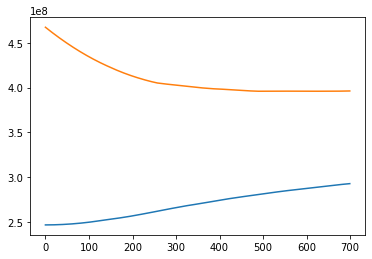

In [61]:
q = 0.0
alphas = []
for i in range(0,700):
    q = round(q + 0.1,2)
    alphas.append(q)

tr = []
ts = []
for i in alphas:
    ls = Lasso(alpha=i)
    tr_err,ts_err = modeller(ls)
    tr.append(tr_err)
    ts.append(ts_err)
plt.plot(tr)
plt.plot(ts)

In [62]:
alphas[500]

50.1

In [63]:
ls = Lasso(alpha=50.1)
modeller(ls)

(281245613.46, 395966148.34)

# Cross Validation

In [65]:
from sklearn.model_selection import GridSearchCV

tg = {"alpha":alphas}
rr = Ridge()

cv = GridSearchCV(rr , tg , scoring="neg_mean_squared_error" , cv= 4)
cv_model = cv.fit(X , Y)
cv_model.best_params_

{'alpha': 4.0}

In [66]:
from sklearn.model_selection import GridSearchCV

tg = {"alpha": alphas}
ls = Lasso()

cv = GridSearchCV(ls , tg , scoring="neg_mean_squared_error" , cv= 4)
cv_model = cv.fit(X , Y)
cv_model.best_params_

{'alpha': 49.0}

In [69]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=4) 
Bestmodel = rr.fit(xtrain, ytrain)
pred_ts = Bestmodel.predict(xtest)
pred_tr = Bestmodel.predict(xtrain)
pred_X = Bestmodel.predict(X)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain , pred_tr)
ts_err = mean_squared_error(ytest , pred_ts)
print( tr_err , ts_err , tr_err-ts_err)


267602285.4662784 407380398.8616256 -139778113.3953472


In [70]:
ls = Lasso(alpha=49) 
model = ls.fit(xtrain, ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain , pred_tr)
ts_err = mean_squared_error(ytest , pred_ts)
print( tr_err , ts_err , tr_err-ts_err)

280540069.3146564 395978823.5923209 -115438754.27766454


# Final Model

In [71]:
ls = Lasso(alpha=49)
model = ls.fit(X,Y)

## Data preparation for predictions

In [73]:
final_df_pred = XX[X.columns]

In [74]:
pred = model.predict(final_df_pred)

In [76]:
Q = test_df[["Id"]]
Q['SalePrice']=pred

In [80]:
Q             # This is our predicted sales Price

,Id,SalePrice
0,1461,114685.622897
1,1462,167370.331527
2,1463,190120.140226
3,1464,203756.251452
4,1465,201902.333016
...,...,...
1454,2915,83270.994817
1455,2916,79806.953001
1456,2917,178510.021947
1457,2918,104659.609108
